In [66]:
# reading data from url provided
url = "http://bit.ly/w-data"
students_data = pd.read_csv(url)
print("data imported successfully")


data imported successfully


Exploring the data

In [67]:
print(students_data.shape)
students_data.head(10)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [68]:
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [69]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plotting Scatter Graph

<function matplotlib.pyplot.show(close=None, block=None)>

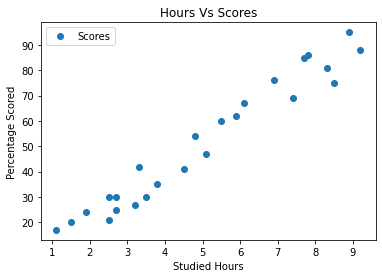

In [70]:
students_data.plot(x="Hours", y="Scores", style="o")
plt.title('Hours Vs Scores')
plt.xlabel("Studied Hours")
plt.ylabel("Percentage Scored")
plt.show

From above graph we can clearly see that there is positive relation between Hours Studied and Percentage. If studied hours increases also Percentage will increases.

In [71]:
students_data.corr(method = "pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# preparing the data
Next step is to divide the data into "attributes" (inputs) and "labels" output

In [72]:
# independant and dependant features
X = students_data.iloc[:, :-1].values  
y = students_data.iloc[:, 1].values

Now that we have our attributes and labels. The next step is to split this data into training and test sets. We will doing this by using Scikit-Learn's built-in train_test_split() method 

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

# Training the algorithm
We have split our data into training and testing sets, and now its finally time to train our algorithm

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training completed.")

Training completed.


Plotting the regression

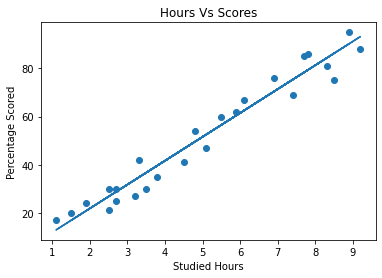

In [75]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data 
plt.scatter(X,y)
plt.plot(X, line);
plt.title('Hours Vs Scores')
plt.xlabel("Studied Hours")
plt.ylabel("Percentage Scored")
plt.show()

# Making Predictions
Now that we have trained our algorithm it's time to make some predictions.

In [76]:
print(x_test) # testing data in Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [77]:
# comparing Actual Vs Predicted
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [78]:
# We can also test our own data 
hours = 9.25
my_pred = regressor.predict([[hours]])
print(f"No. of hours ={hours}")
print(f"Predicted score ={my_pred[0]}")

No. of hours =9.25
Predicted score =93.69173248737535


# We are going to check our model accuracy 
by checking Mean Absolute Error 

In [91]:
from sklearn import metrics
MAE =  print("Mean Absolute Error : " , metrics.mean_absolute_error(y_test, y_pred))
print(round((metrics.mean_absolute_error(y_test, y_pred)), 2))

Mean Absolute Error :  4.183859899002975
4.18
